In [197]:
import numpy as np
import matplotlib.pyplot as plt
import jupyter as j
import importlib

def compare(files, thresh, text, ylabel, xlabel, ky, kx, ry, rx, overlays=['ublox', 'quectel'], graphs=['zte', 'nokia'], split=1, hist=False, bins=20, log=False):
    importlib.reload(j)
    j.compare(files, thresh, text, ylabel, xlabel, ky, kx, ry, rx, overlays, graphs, split, hist, bins, log)

In [198]:
files = []
files.append(['release/release1/*','release/release16/*','release/release64/*','release/release128/*','release/release256/*','release/release512/*', 'release/release0/*'])
files.append(['echo/deregister/*', 'echo/e/*', 'echo/echo/*', 'echo/register/*'])
files.append(['cops/delay/*', 'cops/deregister/*', 'cops/release/*', 'cops/tensec/*'])
files.append(['drx/cap/*'])
files.append(['ptau/capture/*'])
files = sum(files, [])
print(files)

['release/release1/*', 'release/release16/*', 'release/release64/*', 'release/release128/*', 'release/release256/*', 'release/release512/*', 'release/release0/*', 'echo/deregister/*', 'echo/e/*', 'echo/echo/*', 'echo/register/*', 'cops/delay/*', 'cops/deregister/*', 'cops/release/*', 'cops/tensec/*', 'drx/cap/*', 'ptau/capture/*']


custom jupyter @DanielRobinson


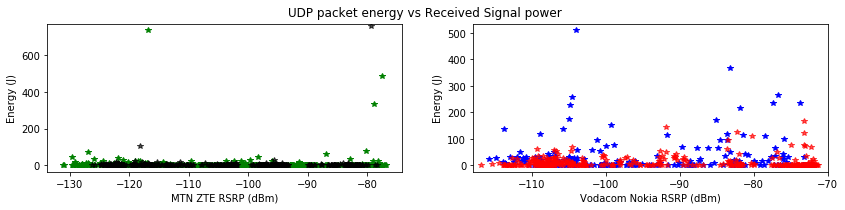

custom jupyter @DanielRobinson
607
386
223
403
0.0 850.0 0.7426487232945567 517.0681480424419


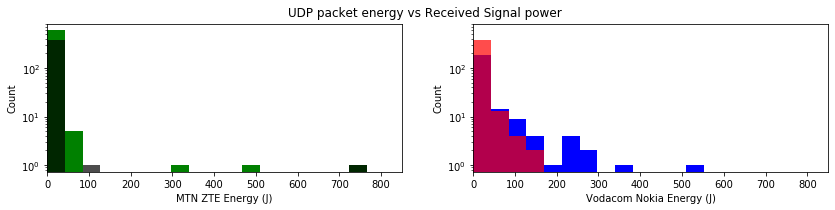

In [204]:
def thresh(a, key, split):
    a = np.array(a[key])
    r = a == a
    lim = [None, None]
    if key == 'Signal power':
        r *= a > -1450
    return r, lim
compare(files, thresh, 'UDP packet energy vs Received Signal power', 'Energy (J)', 'RSRP (dBm)', 'energy', 'Signal power', 1000, 10, split=1)
def thresh(a, key, split):
    a = np.array(a[key])
    r = a == a
    lim = [0, 850000]
    if key == 'Signal power':
        r *= a > -1450
    return r, lim
compare(files, thresh, 'UDP packet energy vs Received Signal power', 'Count', 'Energy (J)', 'energy', 'Signal power', 1000, 10, split=1, hist=True, log=True)

custom jupyter @DanielRobinson


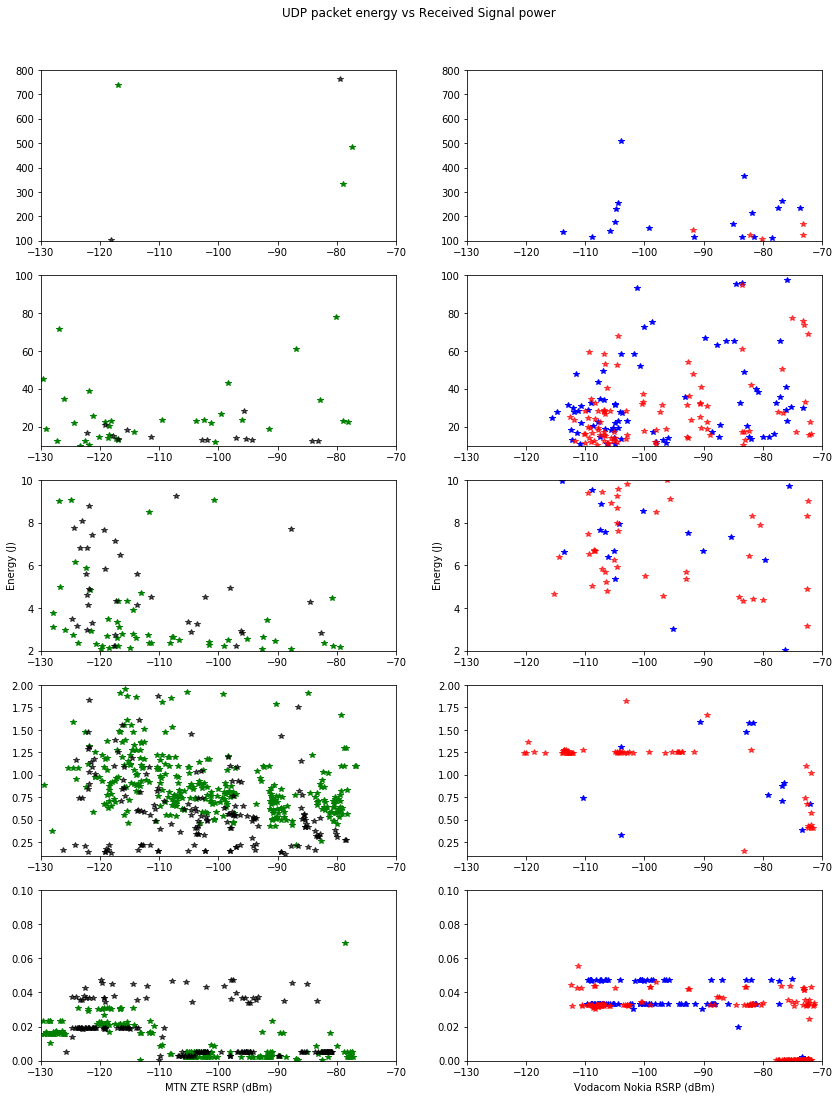

In [205]:
def thresh(a, key, split):
    a = np.array(a[key])
    r = a == a
    lim = [None, None]
    tsplit, slen = split
    if key == 'energy':
        r *= a > 0
        limits = [800000, 100000, 10000, 2000, 100, 0]
        # r, lim = j.splitter(r, a, limits[1:-1], split)
        lim = [limits[tsplit+1], limits[tsplit]]
        r *= a < limits[tsplit]
        r *= a >= limits[tsplit+1]
    elif key == 'Signal power':
        r *= a > -1450
        lim = [-1300, -700]
    return r, lim
compare(files, thresh, 'UDP packet energy vs Received Signal power', 'Energy (J)', 'RSRP (dBm)', 'energy', 'Signal power', 1000, 10, split=5)

(array([4., 0., 4., 0., 0., 5., 0., 5., 0., 2.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

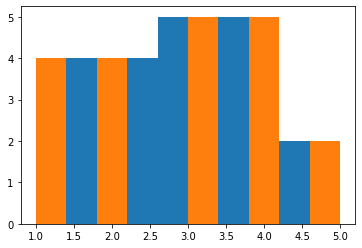

In [57]:
a = [1,1,1,2,5,5,4,2,3,4,4,3,2,1,2,3,3,4,4,3,]
plt.hist(a, 5)
plt.hist(a, range=[min(a), max(a)])

In [187]:
h = np.histogram(a, range=[min(a), max(a)])
# np.histogram?

custom jupyter @DanielRobinson
3
2
18
5
100.0 800.0 0.9226808345905884 5.418991933671841
34
14
78
94
10.0 100.0 0.8567988323372042 25.67697243469354
54
36
18
41
2.0 10.0 0.914307826761828 6.562341286358654
324
160
13
56
0.1 2.0 0.8295403880420883 50.630446215078145
192
164
96
196
0.0 0.1 0.7963680349071999 119.29157856150053


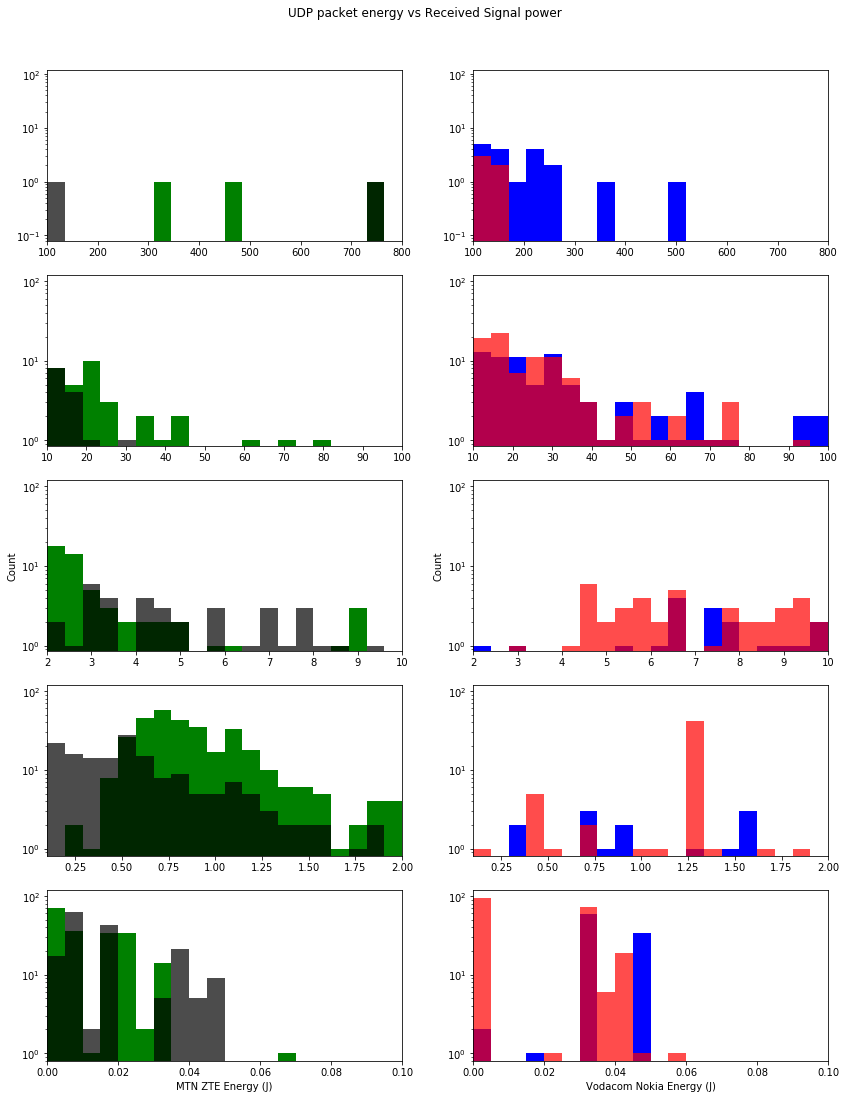

In [207]:
compare(files, thresh, 'UDP packet energy vs Received Signal power', 'Count', 'Energy (J)', 'energy', 'Signal power', 1000, 10, ['ublox', 'quectel'], ['zte', 'nokia'], 5, True, 20, True)

custom jupyter @DanielRobinson


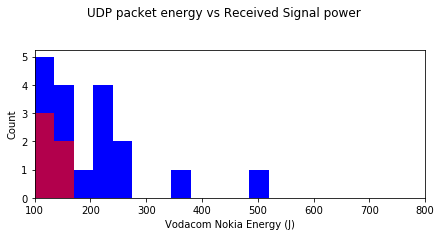

In [196]:
compare(files, thresh, 'UDP packet energy vs Received Signal power', 'Count', 'Energy (J)', 'energy', 'Signal power', 1000, 10, ['ublox', 'quectel'], ['nokia'], 1, True, 20)

custom jupyter @DanielRobinson
100.0 800.0 0.0 2.1
10.0 100.0 0.0 40.95
2.0 10.0 0.0 7.35
0.1 2.0 0.0 44.1
0.0 0.1 0.0 99.75


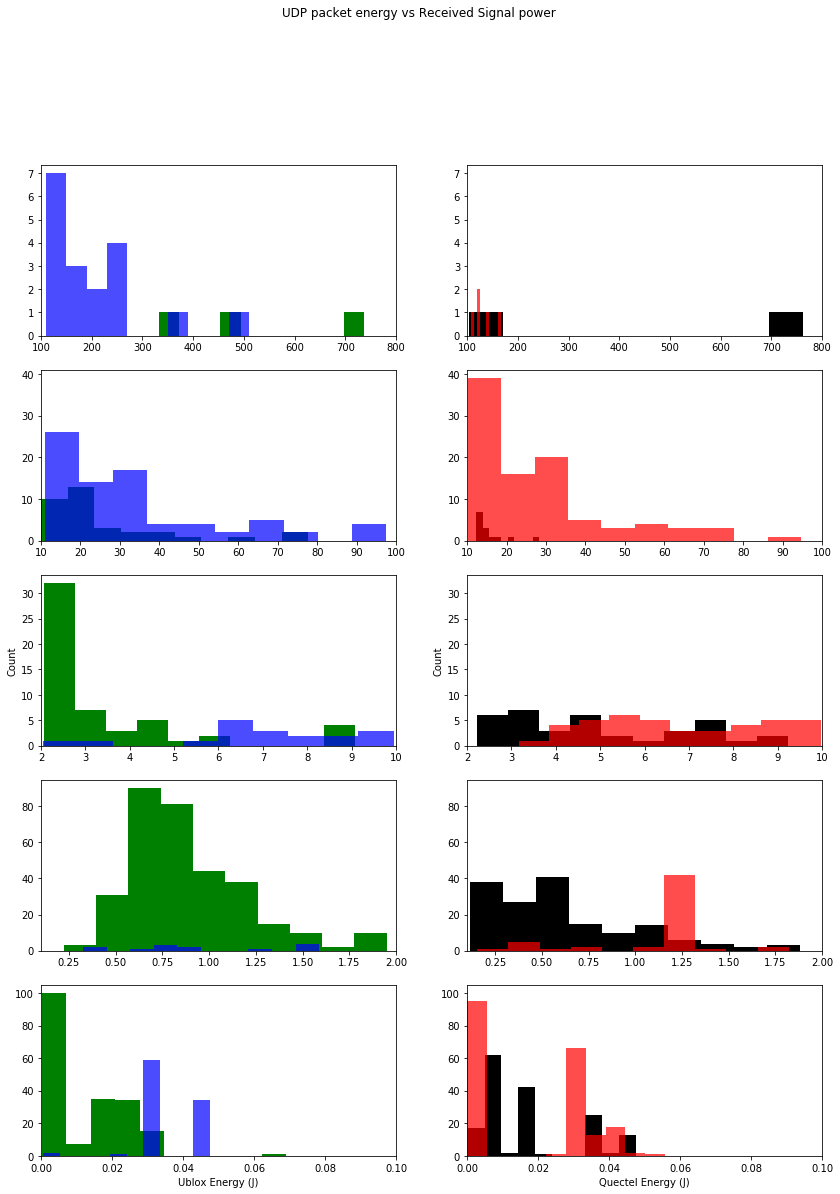

In [167]:
compare(files, thresh, 'UDP packet energy vs Received Signal power', 'Count', 'Energy (J)', 'energy', 'Signal power', 1000, 10, ['zte', 'nokia'], ['ublox', 'quectel'], 5, True)

custom jupyter @DanielRobinson


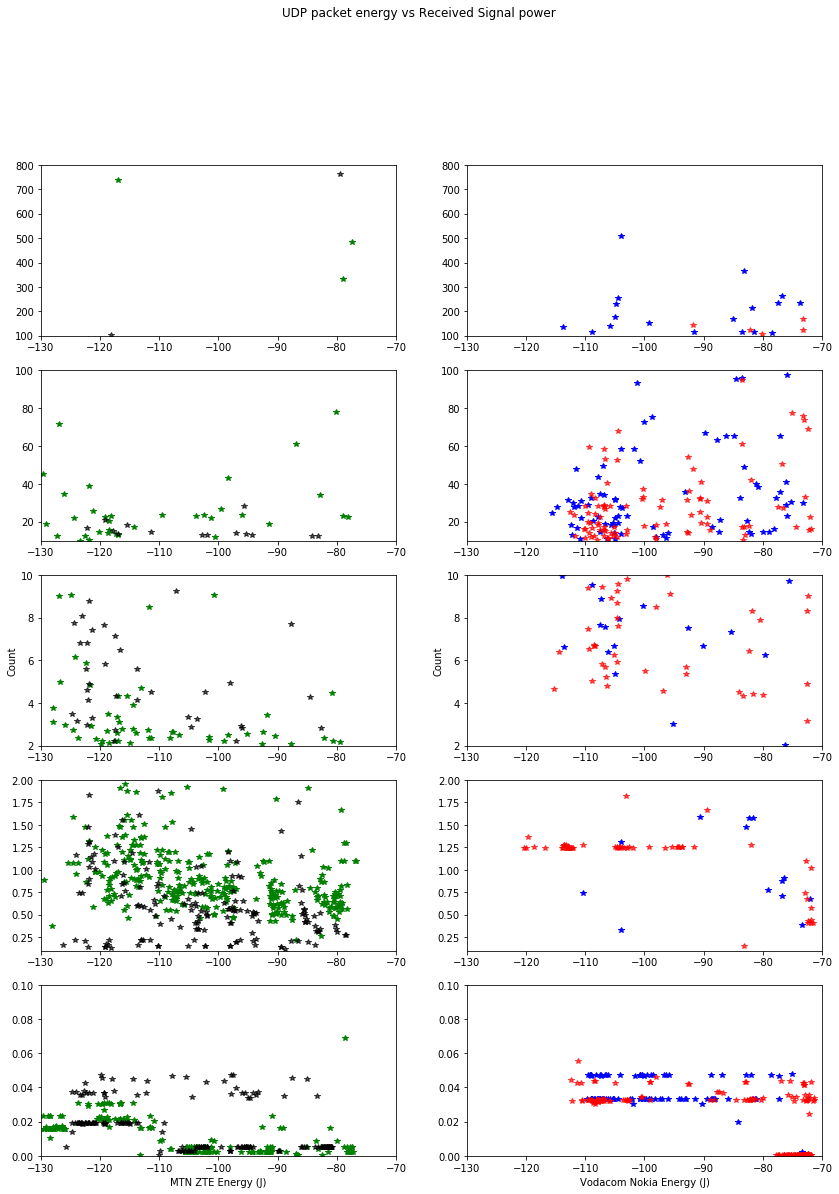

In [165]:
compare(files, thresh, 'UDP packet energy vs Received Signal power', 'Count', 'Energy (J)', 'energy', 'Signal power', 1000, 10, ['ublox', 'quectel'], ['zte', 'nokia'], 5)